In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Создание дата фрейма
np.random.seed(1) #Для фиксации рандома
num_users = 1000 #Количество пользователей

user_id = np.arange(1, num_users + 1)
day_overdue = np.random.randint(1, 365, num_users)
debt_amount = np.random.normal(100, 20, num_users).astype(int)#Сумма задолженности

In [3]:
#debt_returend = np.random.choice([0, 1], num_users)#Вернулась задолженность или нет

In [4]:
df = pd.DataFrame({
    'Номер_пользователя':user_id,
    'Дней_просрочки':day_overdue,
    'Сумма_долга':debt_amount,
    #'Статус_долга':debt_returend
})

In [5]:
groups = ['1-30', '31-60', '61-90', '91-120', '>120']
return_probabilities=[0.8, 0.6, 0.4, 0.2, 0.1]#Вероятность возврата

In [6]:
#Разбиение на группы
def assign_group(day):
    if day <= 30:
        return '1-30'
    elif day <= 60:
        return '31-60'
    elif day <= 90:
        return '61-90'
    elif day <= 120:
        return '91-120'
    else:
        return '>120'
#df['Группа_просрочки'] = df['Дней_просрочки'].apply(assign_group)

In [7]:
df['Группа_просрочки'] = np.array([assign_group(day) for day in day_overdue])
df['Группа_просрочки']

0      31-60
1       >120
2      61-90
3       >120
4       >120
       ...  
995    31-60
996     >120
997     >120
998     >120
999     >120
Name: Группа_просрочки, Length: 1000, dtype: object

In [8]:
debt_returend = np.zeros(num_users)

for group, prob in zip(groups, return_probabilities):
    group_indices=(df['Группа_просрочки'] == group)
    debt_returend[group_indices] = np.random.binomial(1, prob, size=group_indices.sum())

df['Статус_долга'] = debt_returend

In [9]:
#Расчет доли просрочки
group_summary = df.groupby('Группа_просрочки')['Статус_долга'].mean().reset_index()

df=df.merge(group_summary, on= 'Группа_просрочки', how = 'left', suffixes = ('', '_доля'))

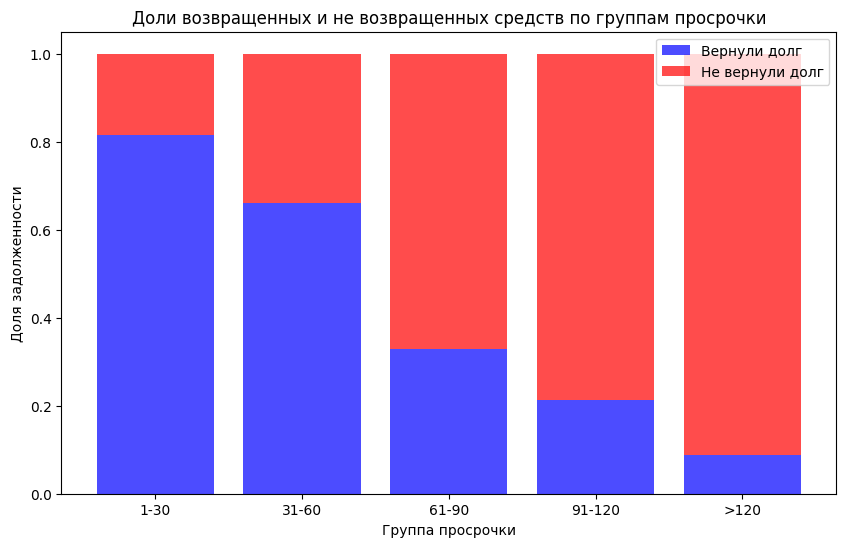

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(group_summary['Группа_просрочки'], group_summary['Статус_долга'], color = 'blue', alpha=0.7, label = 'Вернули долг')
plt.bar(group_summary['Группа_просрочки'], 1-group_summary['Статус_долга'], bottom = group_summary['Статус_долга'], color = 'red', alpha=0.7, label = 'Не вернули долг')
plt.xlabel('Группа просрочки')
plt.ylabel('Доля задолженности')
plt.title('Доли возвращенных и не возвращенных средств по группам просрочки')
plt.legend()
plt.show()